Santander Customer Product Data Visualization 

In [ ]:
# Import necessary packages
import numpy as np # for numerical analysis
import pandas as pd # for data preparation and manipulation
import matplotlib.pyplot as plt # for visuals
import seaborn as sns
sns.set() # Sets matplot lib plots to use the seaborn theme

In [ ]:
# Import dataset - df_clean is the first output file from the the 
# santander_data_cleaning.ipynb file
df_clean = pd.read_csv('/content/drive/MyDrive/Santander/df_clean.csv')
df_clean["vintage"] = pd.to_numeric(df_clean["vintage"], 
                                    errors = 'coerce', downcast = 'integer')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Business Question #1 - What are the most common products used by customers at the bank? 

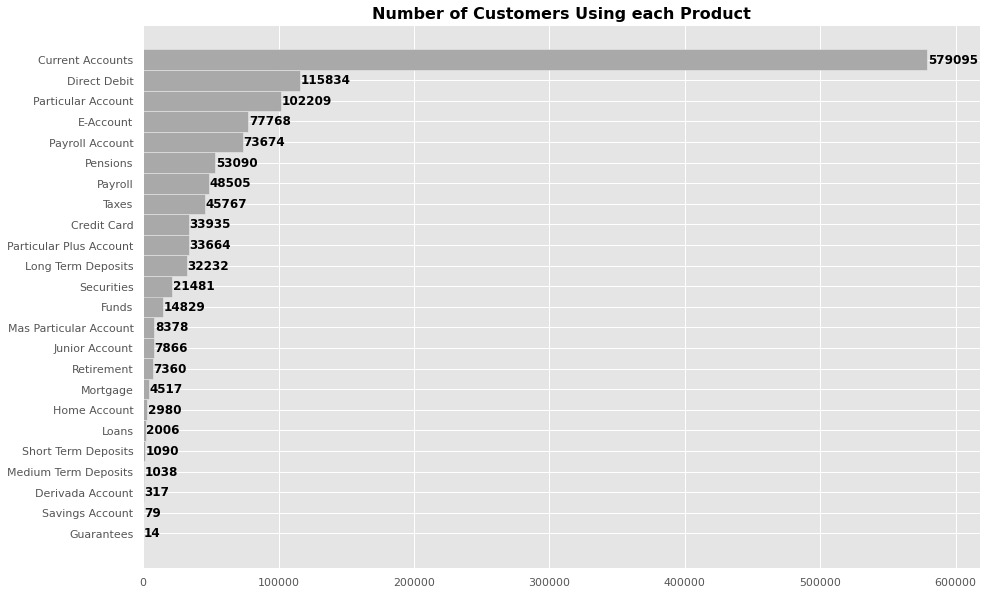

In [ ]:
# Product Popularity plot 

# Create data subset of only product columns according to data dictionary
df2 = df_clean.iloc[:,25:-1]

# change column names for improved visual aesthetics
df2.columns =['Savings Account', 'Guarantees', 'Current Accounts', 
              'Derivada Account','Payroll Account', 'Junior Account', 
              'Mas Particular Account','Particular Account', 
              'Particular Plus Account', 'Short Term Deposits',
              'Medium Term Deposits', 'Long Term Deposits', 'E-Account', 
              'Funds','Mortgage', 'Retirement', 'Loans', 'Taxes', 
              'Credit Card', 'Securities', 'Home Account', 'Payroll', 
              'Pensions', 'Direct Debit']

# Unpivoting dataset to create two columns (Product and Product flag) 
df2 = df2.melt(value_vars=df2.columns)
df2 = df2[df2["value"] == 1]

y = df2['variable'].value_counts().sort_values()
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(y.index, y, height=1, color="darkgray")
plt.title('Number of Customers Using each Product', color='black', 
          fontweight='bold', fontsize=16)
_, xmax = plt.xlim()
plt.xlim(0, xmax+10000)
for i, v in enumerate(y):
    ax.text(v + 500, i, str(v), color='black', fontweight='bold', 
            fontsize=12, ha='left', va='center')
plt.show()

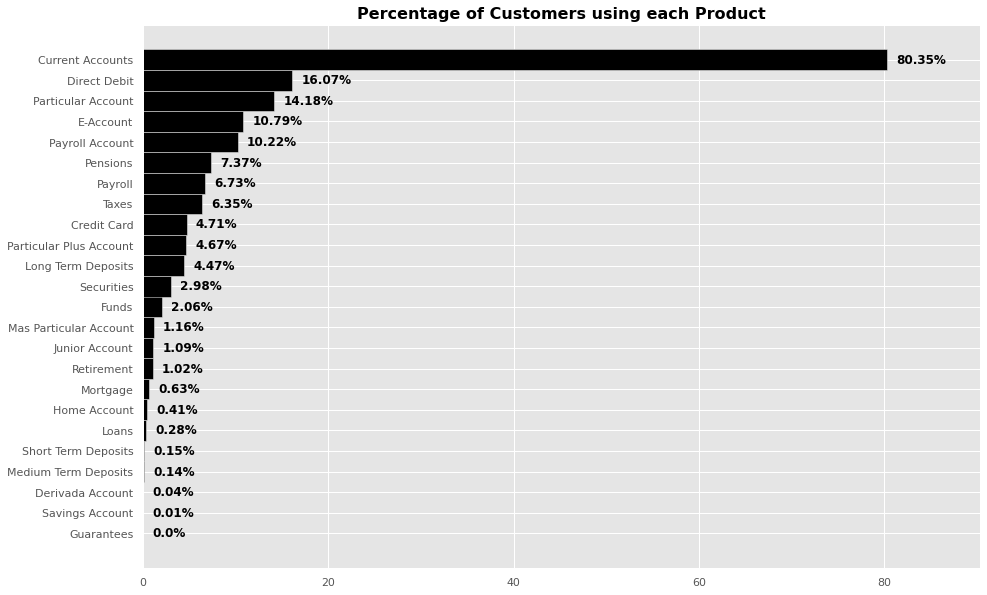

In [ ]:
# Product Popularity plot (percentage)
# Create percentage of clients having each product
y = ((df2['variable'].value_counts()/len(df_clean))*100).sort_values()

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(15,10))
ax.barh(y.index, y, height=1, color="black")
plt.title('Percentage of Customers using each Product', color='black', 
          fontweight='bold', fontsize=16)
_, xmax = plt.xlim()
plt.xlim(0, xmax+6)
for i, v in enumerate(y):
    ax.text(v + 1, i, str(round(v, 2))+'%',  color='black', fontweight='bold', 
            fontsize=12, ha='left', va='center')
plt.show()

In [ ]:
# Number of products summary statistics. 
df_clean.number_of_products.describe()

count    720741.000000
mean          1.711840
std           1.328478
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          14.000000
Name: number_of_products, dtype: float64

Business Question #2- Do customers with longer bank tenure use credit cards more frequently?

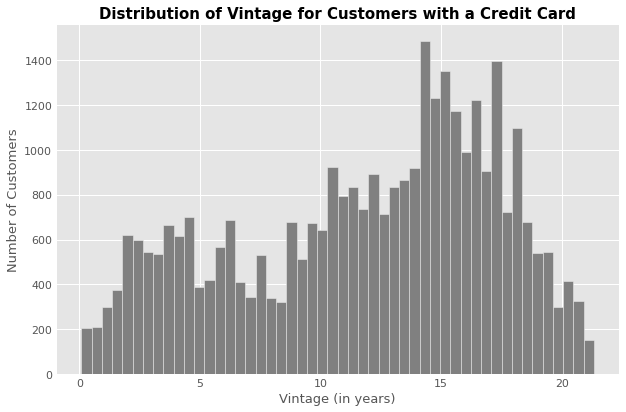

In [ ]:
# Create vintage distribution plot for customers with a credit card
# Convert vintage from months to years 
df_clean['vintage_yr'] = df_clean['vintage']/12

#Create plot and edit styling
plt.style.use('ggplot')
df_clean[df_clean.credit_card == 1].vintage_yr.hist(bins=50, color="grey",  
                                                    figsize=(9,6))
plt.title('Distribution of Vintage for Customers with a Credit Card', 
          color='black', fontweight='bold', fontsize=15)
plt.xlabel('Vintage (in years)', fontsize = 13)
plt.ylabel('Number of Customers', fontsize = 13)
plt.show()


In [ ]:
# Summary statistics for vintage for customers with a credit card
df_clean[df_clean.credit_card == 1][df_clean.vintage>0].vintage.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    33935.000000
mean       141.794283
std         64.733951
min          1.000000
25%         90.000000
50%        155.000000
75%        194.000000
max        256.000000
Name: vintage, dtype: float64

In [ ]:
# Summary statistics for age for customers with a credit card
df_clean[df_clean.credit_card == 1][df_clean.vintage>0].age.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    33935.000000
mean        48.345189
std         10.628114
min         20.000000
25%         42.000000
50%         47.000000
75%         54.000000
max        108.000000
Name: age, dtype: float64

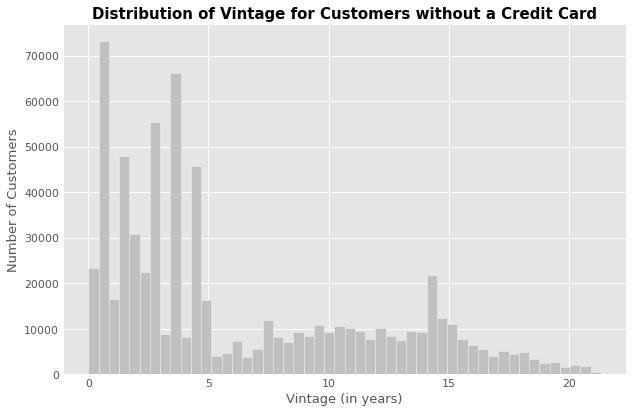

In [ ]:
# Create vintage distribution plot for customers without credit card

df_no_cc = df_clean[df_clean.credit_card == 0]
df_no_cc[df_clean.vintage >= 0].vintage_yr.hist(bins=50, color="silver", 
                                                figsize=(9,6))
plt.title('Distribution of Vintage for Customers without a Credit Card', 
          color='black', fontweight='bold', fontsize=15)
plt.xlabel('Vintage (in years)', fontsize = 13)
plt.ylabel('Number of Customers',fontsize = 13)
plt.show()

In [ ]:
# Summary statistics for vintage for customers with a credit card
df_clean[df_clean.credit_card == 0][df_clean.vintage>0].vintage.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    686655.000000
mean         75.465410
std          65.338142
min           1.000000
25%          22.000000
50%          46.000000
75%         127.000000
max         256.000000
Name: vintage, dtype: float64

In [ ]:
# Summary statistics for age for customers with a credit card
df_clean[df_clean.credit_card == 0][df_clean.vintage>0].age.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count    686655.000000
mean         39.066253
std          17.071554
min           2.000000
25%          24.000000
50%          36.000000
75%          49.000000
max         117.000000
Name: age, dtype: float64

Business Question #3 - Do value segments differ in the amount of products that they use? 

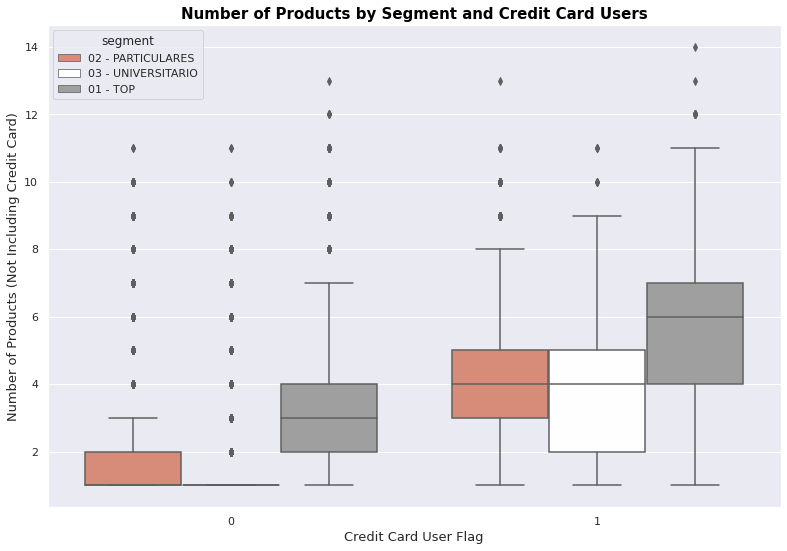

In [ ]:
# Boxplot of number of products by segment

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'credit_card', y ='number_of_products', data = df_clean, 
            hue ='segment', palette = 'RdGy')

plt.title('Number of Products by Segment and Credit Card Users', 
          color='black', fontweight='bold', fontsize=15)
plt.xlabel('Credit Card User Flag', fontsize = 13)
plt.ylabel('Number of Products (Not Including Credit Card)', fontsize = 13)
plt.style.use('ggplot')
plt.show()